In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import copy

In [3]:
TRANSFORMATION_TYPES = ["Amplitude", "Clipping", "Drop", "HP", "LP", "Noise", "Scale", "Frame"]
BASE_PATH = "Data"
AVERAGE_ROW = 198
STD_ROW = 199
SAVE_FOLDER = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/speechPaper/figs/"


In [4]:
def get_filename_filler(): 
        return "Speech_Understaning_Survey - " 

In [5]:
def process_num_arr(num_arr, tr_type):
    tag = str(num_arr[0])
    if tr_type != "Amplitude":
        num_arr = num_arr[1:len(num_arr)] 
    else:
        num_arr = num_arr[2:len(num_arr)]
    return [float(i) for i in num_arr], tag

In [6]:
def get_file_data(transformation_type):
    file_name = BASE_PATH + "/" + get_filename_filler() + transformation_type + ".csv"
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        file_arr = list(reader)
    return file_arr, transformation_type

In [7]:
def get_worst_degradation(avg_row):
    last_ind =  len(avg_row) - 1
#     print(last_ind)
#     return (10 - np.min(avg_row))*100/10 
    return (10 - avg_row[last_ind])*100/10 

In [8]:
def get_best_degradation(avg_row):
    last_ind =  len(avg_row) - 1
#     print(last_ind)
#     return (10 - np.max(avg_row))*100/10 
    return (10 - avg_row[0])*100/10 
    

In [9]:
def get_relative_degradation(avg_row):
    last_ind =  len(avg_row) - 1
#     print(last_ind)
#     return (np.max(avg_row) - np.min(avg_row))*100/10 
    return (avg_row[0] - avg_row[last_ind])*100/10 

Amplitude 4.517766490000001
Average [7.63 7.49 7.56 7.50 7.18]
----------------
Clipping 4.467005080000002
Average [7.42 7.16 7.34 6.93 6.97]
----------------
Drop 8.324873090000002
Average [7.90 7.43 7.46 7.22 7.07]
----------------
HP 3.451776650000005
Average [7.76 7.55 7.40 7.32 7.41]
----------------
LP 3.14720812
Average [7.34 7.18 7.07 7.13 7.03]
----------------
Noise 3.857868019999992
Average [7.22 7.05 7.03 6.99 6.84]
----------------
Scale 10.05076142
Average [7.78 7.34 7.20 6.94 6.78]
----------------
Frame 0.761421320000002
Average [7.45 7.42 7.51 7.51 7.38]
----------------
4.822335023750001
10.05076142
0.761421320000002


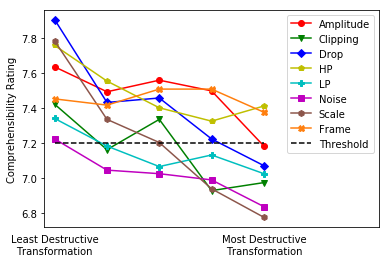

In [10]:
COLORS = ['r', 'g', 'b', 'y', 'c', 'm', 'tab:brown', 'tab:orange']
MARKERS = ['o', 'v', 'D', 'p', 'P', 's', 'h', 'X']

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

THRESHOLD = 7.2

x_values = range(5)
x_labels = []
degradarion_arr = []
degrade_vals = []
for i, tr_type in enumerate(TRANSFORMATION_TYPES):
    file_arr, _ = get_file_data(tr_type)
    avg_row_raw = file_arr[AVERAGE_ROW]
    avg_row, tag = process_num_arr(avg_row_raw, tr_type)
    
    degrade_val = get_relative_degradation(avg_row)
    degradarion_arr.append((tr_type, degrade_val))
    print(tr_type, degrade_val)
    degrade_vals.append(degrade_val)
    
    plt.plot(x_values, avg_row, color=COLORS[i], label=tr_type, marker = MARKERS[i])
    print(tag, np.array(avg_row))
    print("----------------")
    
print(np.mean(degrade_vals))
print(np.max(degrade_vals))
print(np.min(degrade_vals))
    
for i in range(len(x_values)):
    if (i == 0):
        x_labels.append("Least Destructive\nTransformation")
    elif (i == (len(x_values) - 1)):
        x_labels.append("Most Destructive\nTransformation")
    else:
        x_labels.append("")
    
    

    

plt.plot(x_values, ([THRESHOLD] * 5), color='k', label="Threshold", linestyle = 'dashed')
plt.xlim(right = 6.2)
# print(x_labels)
# plt.ylim(top = 8.5)
plt.legend() 

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

plt.xticks(x_values, x_labels)
plt.ylabel("Comprehensibility Rating")
# plt.savefig(SAVE_FOLDER + "User-Study-Graph", dpi=300, bbox= 'tight')
plt.show()

In [10]:
for i in degradarion_arr:
    print(i)

('Amplitude', 4.517766490000001)
('Clipping', 4.467005080000002)
('Drop', 8.324873090000002)
('HP', 3.451776650000005)
('LP', 3.14720812)
('Noise', 3.857868019999992)
('Scale', 10.05076142)
('Frame', 0.761421320000002)


In [14]:
degrade_vals = []
for i, tr_type in enumerate(TRANSFORMATION_TYPES):
    file_arr, _ = get_file_data(tr_type)
    avg_row_raw = file_arr[AVERAGE_ROW]
    avg_row, tag = process_num_arr(avg_row_raw, tr_type)
    
    degrade_val = get_best_degradation(avg_row)
    degrade_vals.append(degrade_val)
    degradarion_arr.append((tr_type, degrade_val))
    print(tr_type, degrade_val)
print()    
print(np.mean(degrade_vals))
print(np.max(degrade_vals))
print(np.min(degrade_vals))

Amplitude 23.65482234
Clipping 25.78680203
Drop 20.964467009999996
HP 22.43654822
LP 26.598984769999998
Noise 27.766497460000004
Scale 22.182741119999996
Frame 25.4822335

24.35913705625
27.766497460000004
20.964467009999996


In [15]:
degrade_vals = []
for i, tr_type in enumerate(TRANSFORMATION_TYPES):
    file_arr, _ = get_file_data(tr_type)
    avg_row_raw = file_arr[AVERAGE_ROW]
    avg_row, tag = process_num_arr(avg_row_raw, tr_type)
    
    degrade_val = get_worst_degradation(avg_row)
    degrade_vals.append(degrade_val)
    degradarion_arr.append((tr_type, degrade_val))
    print(tr_type, degrade_val)
print()    
print(np.mean(degrade_vals))
print(np.max(degrade_vals))
print(np.min(degrade_vals))

Amplitude 28.172588830000002
Clipping 30.253807110000004
Drop 29.289340099999997
HP 25.88832487
LP 29.746192889999996
Noise 31.624365479999994
Scale 32.233502539999996
Frame 26.24365482

29.18147208
32.233502539999996
25.88832487
